<a href="https://colab.research.google.com/github/opensim-org/opensim-models/blob/master/notebooks/tutorials/Tutorial_4_Musculoskeletal_models%2C_Motion_Files_and_MuscleAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4. Musculoskeletal models, Motion Files and MuscleAnalysis

## 4.1. Objectives

**Introduction**

Musculoskeletal models enable us to study neuromuscular coordination, analyze athletic performance and estimate musculoskeletal loads [[1]](https://mitpress.mit.edu/9780262044202/biomechanics-of-movement/). In [OpenSim](https://opensim.stanford.edu/) [[2]](https://doi.org/10.1109/TBME.2007.901024), a musculoskeletal model consists of rigid body segments connected by joints. Muscles span these joints and generate forces and motion. Once a musculoskeletal model is created, OpenSim enables users to create custom studies, including investigating the effects of musculoskeletal geometry, joint kinematics, and muscle-tendon properties on the forces and joint moments the muscles can produce. With OpenSim, our goal is to provide a framework that allows the biomechanics community to create, share, and extend a library of models and dynamic simulation tools that can be used to study and quantify human and animal movement.  

**Purpose**

The purpose of this tutorial is to introduce users to the use of Conda OpenSim for musculoskeletal modeling by demonstrating the utility of this framework to investigate how muscle-tendon lengths and moment arms depend on limb configuration. In this tutorial, you will:

*   Become familiar with OpenSim's API.
*   Discover some limitations of musculoskeletal models.
*   Learn to work with motion files.
*   Learn to use the MuscleAnalysis tool.
*   Use OpenSim to approach an important clinical problem.

**Format**

Each section of the tutorial guides you through certain tools within OpenSim and asks you to answer a few questions. The questions can be answered based on information from OpenSim and basic knowledge of the human musculoskeletal system. As you complete each section of the tutorial, feel free to explore OpenSim and the lower extremity model further on your own.

## 4.2. Setup Conda and OpenSim

First, set up the environment by executing the following cell (See ***Tutorial 1: Introduction to OpenSim in Colab***).

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


Now, let's install the OpenSim conda package.

In [ ]:
!conda install -c opensim-org opensim

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - done

# All requested packages already installed.

Retrieving notices: ...working... done


## 4.3. Downloading and exploring the model

In this section, you will download a model of the lower extremity [[3]](https://doi.org/10.1109/10.102791), and then load it into OpenSim. The model represents an adult subject with an approximate height of 1.8 m and an approximate mass of 75 kg. The model consists of 13 rigid body segments and includes the lines of action of 92 muscles (43 per leg and 6 at the torso).

First, let's download the model from the GitHub repository.

In [ ]:
import requests

# TODO Host tutorial models elsewhere?
# Download the model from the GitHub repository.
url = 'https://raw.githubusercontent.com/opensim-org/opensim-models/master/Models/Gait2392_Simbody/subject01.osim'
req = requests.get(url, allow_redirects=True)
open('gait2392.osim', 'wb').write(req.content)

565367

Now, let's import opensim, load the model, and print some metadata.

In [ ]:
import opensim as osim

# Load the model.
gait2392 = osim.Model('gait2392.osim')

# Print metadata.
print("Name of the model:", gait2392.getName())
print("Author:", gait2392.get_credits())
print("Publications:", gait2392.get_publications())
print("Length Unit:", gait2392.get_length_units())
print("Force Unit:", gait2392.get_force_units())
print("Gravity:", gait2392.get_gravity())

Name of the model: subject01
Author: Delp S.L., Loan J.P., Hoy M.G., Zajac F.E., Topp E.L., Rosen J.M., Thelen D.G., Anderson F.C., Seth A. Notes: 3D, 23 DOF gait model created by D.G. Thelen, Univ. of Wisconsin-Madison, and Ajay Seth, Frank C. Anderson, and Scott L. Delp, Stanford University. Lower extremity joint defintions based on Delp et al. (1990). Low back joint and anthropometry based on Anderson and Pandy (1999, 2001). Planar knee model of Yamaguchi and Zajac (1989). Seth replaced tibia translation constraints with a CustomJoint for the knee and removed the patella to eliminate all kinematic constraints; insertions of the quadrucepts are handled with moving points in the tibia frame as defined by Delp 1990. License: Creative Commons (CCBY 3.0). You are free to distribute, remix, tweak, and build upon this work, even commercially, as long as you credit us for the original creation. http://creativecommons.org/licenses/by/3.0/ More Information: http://simtk-confluence.stanford.ed

Finally, let's explore the coordinates of the model. We know the model has 23 coordinates from the name of the model file.

In [ ]:
# Print number of coordinates.
print("Num Coordinates:", gait2392.getNumCoordinates())
print()

# For each coordinate, print some information like its name or motion type.
for coordinate in gait2392.getCoordinateSet():
  print("  Coordinate Name:", coordinate.getName())
  print("  Coordinate Absolute Path:", coordinate.getAbsolutePathString())
  print("  Coordinate Motion Type:", coordinate.getMotionType())
  
  print()

Num Coordinates: 23

  Coordinate Name: pelvis_tilt
  Coordinate Absolute Path: /jointset/ground_pelvis/pelvis_tilt
  Coordinate Motion Type: 1

  Coordinate Name: pelvis_list
  Coordinate Absolute Path: /jointset/ground_pelvis/pelvis_list
  Coordinate Motion Type: 1

  Coordinate Name: pelvis_rotation
  Coordinate Absolute Path: /jointset/ground_pelvis/pelvis_rotation
  Coordinate Motion Type: 1

  Coordinate Name: pelvis_tx
  Coordinate Absolute Path: /jointset/ground_pelvis/pelvis_tx
  Coordinate Motion Type: 2

  Coordinate Name: pelvis_ty
  Coordinate Absolute Path: /jointset/ground_pelvis/pelvis_ty
  Coordinate Motion Type: 2

  Coordinate Name: pelvis_tz
  Coordinate Absolute Path: /jointset/ground_pelvis/pelvis_tz
  Coordinate Motion Type: 2

  Coordinate Name: hip_flexion_r
  Coordinate Absolute Path: /jointset/hip_r/hip_flexion_r
  Coordinate Motion Type: 1

  Coordinate Name: hip_adduction_r
  Coordinate Absolute Path: /jointset/hip_r/hip_adduction_r
  Coordinate Motion Type

Let's explore some of the model's joint properties.

In [ ]:
# Print number of joints.
print("Num Joints:", gait2392.getNumJoints())
print()

# For each joint, print some information like its name or components.
for joint in gait2392.getJointSet():
  print("Joint Name:", joint.getName())
  print("Joint Absolute Path:", joint.getAbsolutePathString())
  print("Components:")
  for component in joint.getComponentsList():
    print("  Component Name:", component.getName())
    print("  Component Absolute Path:", component.getAbsolutePathString())
  print()

Num Joints: 12

Joint Name: ground_pelvis
Joint Absolute Path: /jointset/ground_pelvis
Components:
  Component Name: pelvis_tilt
  Component Absolute Path: /jointset/ground_pelvis/pelvis_tilt
  Component Name: pelvis_list
  Component Absolute Path: /jointset/ground_pelvis/pelvis_list
  Component Name: pelvis_rotation
  Component Absolute Path: /jointset/ground_pelvis/pelvis_rotation
  Component Name: pelvis_tx
  Component Absolute Path: /jointset/ground_pelvis/pelvis_tx
  Component Name: pelvis_ty
  Component Absolute Path: /jointset/ground_pelvis/pelvis_ty
  Component Name: pelvis_tz
  Component Absolute Path: /jointset/ground_pelvis/pelvis_tz
  Component Name: ground_offset
  Component Absolute Path: /jointset/ground_pelvis/ground_offset
  Component Name: frame_geometry
  Component Absolute Path: /jointset/ground_pelvis/ground_offset/frame_geometry
  Component Name: wrapobjectset
  Component Absolute Path: /jointset/ground_pelvis/ground_offset/wrapobjectset
  Component Name: pelvis_o

And finally, let's explore the muscles in the model. We know the model has 93 muscles from the name of the model file.



In [ ]:
# TODO Is there any easier way of extracting the number of muscles?
# Print number of muscles.
num_muscles = 0
for muscle in gait2392.getMuscles():
  num_muscles = num_muscles + 1
print("Num Muscles:", num_muscles)
print()

for muscle in gait2392.getMuscles():
  print("Muscle Name:", muscle.getName())
  print("Muscle Absolute Path:", muscle.getAbsolutePathString())
  print()

Num Muscles: 92

Muscle Name: glut_med1_r
Muscle Absolute Path: /forceset/glut_med1_r

Muscle Name: glut_med2_r
Muscle Absolute Path: /forceset/glut_med2_r

Muscle Name: glut_med3_r
Muscle Absolute Path: /forceset/glut_med3_r

Muscle Name: glut_min1_r
Muscle Absolute Path: /forceset/glut_min1_r

Muscle Name: glut_min2_r
Muscle Absolute Path: /forceset/glut_min2_r

Muscle Name: glut_min3_r
Muscle Absolute Path: /forceset/glut_min3_r

Muscle Name: semimem_r
Muscle Absolute Path: /forceset/semimem_r

Muscle Name: semiten_r
Muscle Absolute Path: /forceset/semiten_r

Muscle Name: bifemlh_r
Muscle Absolute Path: /forceset/bifemlh_r

Muscle Name: bifemsh_r
Muscle Absolute Path: /forceset/bifemsh_r

Muscle Name: sar_r
Muscle Absolute Path: /forceset/sar_r

Muscle Name: add_long_r
Muscle Absolute Path: /forceset/add_long_r

Muscle Name: add_brev_r
Muscle Absolute Path: /forceset/add_brev_r

Muscle Name: add_mag1_r
Muscle Absolute Path: /forceset/add_mag1_r

Muscle Name: add_mag2_r
Muscle Absolu

## 4.4. Working with motion files

In this section you will load information from a motion file. But first, you have to download it using the same method as in the previous section. Since the motion file already contains the values resulting from a simulation, you will not need to simulate the model to access to this information.

First, let's download the motion file from the GitHub repository.

In [ ]:
import requests

# TODO Host tutorial models elsewhere?
# Download the motion file from the GitHub repository.
url = 'https://raw.githubusercontent.com/opensim-org/opensim-models/master/Tutorials/Intro_to_Musculoskeletal_Modeling/normal.mot'
req = requests.get(url, allow_redirects=True)
open('normal_gait.mot', 'wb').write(req.content)

5971

Use TableProcessor to load and process the file. Print column labels to check the file has been processed properly.

In [ ]:
# Use the TableProcessor to read the motion file.
table = osim.TableProcessor('normal_gait.mot')
# Process the file.
tableTime = table.process()
# Print labels for each column.
print(tableTime.getColumnLabels())

('pelvis_list', 'pelvis_rotation', 'pelvis_tilt', 'hip_flexion_r', 'hip_adduction_r', 'hip_rotation_r', 'knee_angle_r', 'ankle_angle_r', 'hip_flexion_l', 'hip_adduction_l', 'hip_rotation_l', 'knee_angle_l', 'ankle_angle_l', 'pelvis_ty', 'lumbar_bending', 'lumbar_rotation', 'lumbar_extension')


We will plot, for example, the knee angle and hip adduction between both legs. In the next cell you will extract this information from the motion file.

In [ ]:
# Get columns we want to represent, and the independent column (Time).
y_knee_angle_r = tableTime.getDependentColumn('knee_angle_r')
y_knee_angle_l = tableTime.getDependentColumn('knee_angle_l')
y_hip_adduction_r = tableTime.getDependentColumn('hip_adduction_r')
y_hip_adduction_l = tableTime.getDependentColumn('hip_adduction_l')
x_time = tableTime.getIndependentColumn()

Now, you can use Seaborn to plot the information.

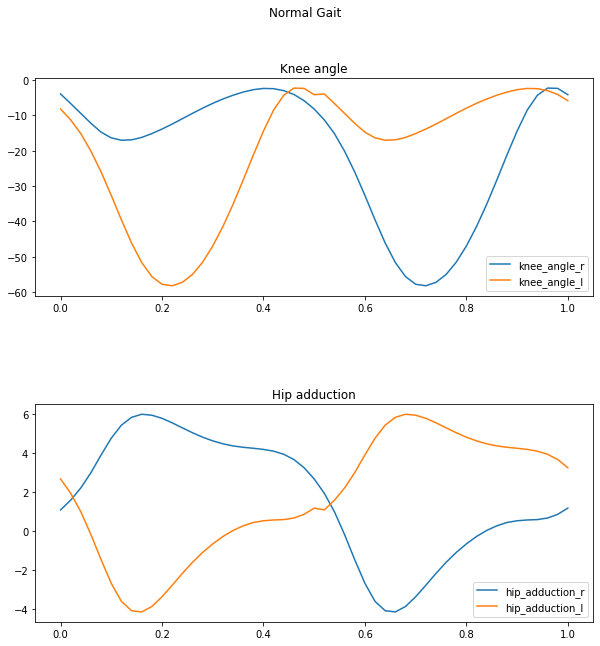

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, 1, figsize=(10, 10))

fig.suptitle('Normal Gait')

# Knee angle to chart 1.
sns.lineplot(x=x_time, y=y_knee_angle_r.to_numpy(), ax=axes[0], label='knee_angle_r')
sns.lineplot(x=x_time, y=y_knee_angle_l.to_numpy(), ax=axes[0], label='knee_angle_l').set(title='Knee angle')

# Hip adduction to chart 2.
sns.lineplot(x=x_time, y=y_hip_adduction_r.to_numpy(), ax=axes[1], label='hip_adduction_r')
sns.lineplot(x=x_time, y=y_hip_adduction_l.to_numpy(), ax=axes[1], label='hip_adduction_l').set(title='Hip adduction')

# Set the spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

## 4.5. MuscleAnalysis: Assessment of Hamstrings Length During Crouch Gait

In this final section of the tutorial, you will use OpenSim to investigate a possible cause of crouch gait, one of the most common walking abnormalities among individuals with cerebral palsy. It is characterized by excessive flexion of the knee during stance phase, which is often accompanied by exaggerated flexion and internal rotation of the hip. One hypothesized cause of crouch gait is short hamstrings, and orthopedic surgeons will sometimes lengthen the hamstrings of such patients in an attempt to improve their posture and gait. However, other causes of excessive knee flexion are possible (e.g. weak ankle plantarflexors), and lengthening the hamstrings can compromise these muscles' force-generation capabilities [[3]](https://doi.org/10.1016/j.gaitpost.2005.03.003). How can a surgeon determine whether a hamstring lengthening procedure is warranted? 

One possible way to judge whether a patient's hamstrings are shorter than "normal" is to develop a musculoskeletal model and compare the length of the hamstrings during the patient's crouch gait cycle to the length of the hamstrings during a normal gait cycle. Suppose that an orthopaedic surgeon has brought you some kinematic data for a patient who walks with a crouch gait. The surgeon is contemplating whether to operate and wants your opinion.  

### 4.5.1. Part 1: Range of Motion

First, let's download the crouch gait motion file. We already downloaded the normal gait motion file in the previous section.

In [ ]:
import requests

# TODO Host tutorial models elsewhere?
# Download the motion file from the GitHub repository.
url = 'https://raw.githubusercontent.com/opensim-org/opensim-models/master/Tutorials/Intro_to_Musculoskeletal_Modeling/crouch1.mot'
req = requests.get(url, allow_redirects=True)
open('crouch_gait.mot', 'wb').write(req.content)

14112

Use TableProcessor to load and process the motion file. Print column labels to check the files have been processed properly.

In [ ]:
# Use the TableProcessor to read the motion file.
table_processor_normal_gait = osim.TableProcessor('normal_gait.mot')
# Process the file.
table_normal_gait = table_processor_normal_gait.process()
# Print labels for each column.
print(table_normal_gait.getColumnLabels())

# Use the TableProcessor to read the motion file.
table_processor_crouch_gait = osim.TableProcessor('crouch_gait.mot')
# Process the file.
table_crouch_gait = table_processor_crouch_gait.process()
# Print labels for each column.
print(table_crouch_gait.getColumnLabels())

('pelvis_list', 'pelvis_rotation', 'pelvis_tilt', 'hip_flexion_r', 'hip_adduction_r', 'hip_rotation_r', 'knee_angle_r', 'ankle_angle_r', 'hip_flexion_l', 'hip_adduction_l', 'hip_rotation_l', 'knee_angle_l', 'ankle_angle_l', 'pelvis_ty', 'lumbar_bending', 'lumbar_rotation', 'lumbar_extension')
('pelvis_list', 'pelvis_rotation', 'pelvis_tilt', 'hip_flexion_r', 'hip_adduction_r', 'hip_rotation_r', 'knee_angle_r', 'ankle_angle_r', 'hip_flexion_l', 'hip_adduction_l', 'hip_rotation_l', 'knee_angle_l', 'ankle_angle_l', 'pelvis_ty', 'lumbar_bending', 'lumbar_rotation', 'lumbar_extension')


Let's obtain the information we want to plot. This time, we obtain two independent columns, one per each table. Since both have a range from 0 to 1, we can plot them and compare them.

In [ ]:
# Get columns we want to represent.
normal_gait_knee_angle_r = table_normal_gait.getDependentColumn('knee_angle_r')
crouch_gait_knee_angle_r = table_crouch_gait.getDependentColumn('knee_angle_r')

# Get independent columns of each table (time).
normal_gait_time = table_normal_gait.getIndependentColumn()
crouch_gait_time = table_crouch_gait.getIndependentColumn()

Now let's plot to quantitatively compare.

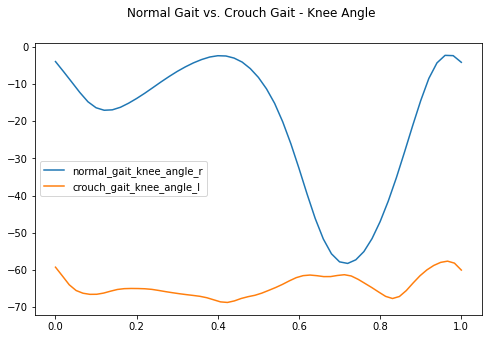

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 1, figsize=(8, 5))

fig.suptitle('Normal Gait vs. Crouch Gait - Knee Angle')

sns.lineplot(x=normal_gait_time, y=normal_gait_knee_angle_r.to_numpy(), ax=axes, label='normal_gait_knee_angle_r')
sns.lineplot(x=crouch_gait_time, y=crouch_gait_knee_angle_r.to_numpy(), ax=axes, label='crouch_gait_knee_angle_l')

**Questions: Range of Motion**


**1.** Label the times at which heel strike and toe-off occur, and the stance and swing intervals. 



**2.** What is the range of motion for knee flexion during stance phase for normal gait?



**3.** How does knee flexion range of motion for crouch gait compare to that of normal gait?

### 4.5.2. Part 2: Hamstrings Length

An orthopedic surgeon believes that a patient may benefit from a hamstring lengthening surgery. You are tasked to compare the hamstrings (semitendinosus) length over a patients crouch gait cycle to the hamstrings length for a "normal" gait cycle. This time, a Muscle Analysis must be performed to obtain the fiber lengths of the muscles.

First, let's load the motion files to obtain the initial and ending time. In both files, the initial and ending times are the same, so we obtain the values from just one of them.

In [ ]:
# Load motion files as Storage objects.
motion_storage_normal_gait = osim.Storage("normal_gait.mot");
motion_storage_crouch_gait = osim.Storage("crouch_gait.mot");

# Get first and last time.
first_time = motion_storage_normal_gait.getFirstTime()
last_time = motion_storage_normal_gait.getLastTime()

Now, let's create a MuscleAnalysis and configure it. This analysis will be applied two times: One for the normal gait and another for the crouch gait.

In [ ]:
# Define a MuscleAnalysis.
muscle_analysis = osim.MuscleAnalysis()

# Set start and end times for the analysis.
muscle_analysis.setStartTime(first_time)
muscle_analysis.setEndTime(last_time)

# Set muscle of interest.
muscle_list = osim.ArrayStr()
muscle_list.append("semiten_r")
muscle_analysis.setMuscles(muscle_list)

# Configure the analysis.
muscle_analysis.setOn(True)
muscle_analysis.setStepInterval(1)
muscle_analysis.setInDegrees(True)
muscle_analysis.setComputeMoments(True)

Now, let's create an Analyze Tool that, given a model file and a motion file, performs the requested analysis. In this case, the Muscle Analysis. We have to create an Analyze Tool for the normal gait and another for the crouch gait. This may take a few seconds.

In [ ]:
## Normal Gait.

# Create analyze tool for normal gait.
analyze_tool_normal_gait = osim.AnalyzeTool()
analyze_tool_normal_gait.setName("Muscle_Analysis_Normal_Gait")

# Set model file and motion file paths.
analyze_tool_normal_gait.setModelFilename("gait2392.osim")
analyze_tool_normal_gait.setCoordinatesFileName("normal_gait.mot")

# Add analysis to analyze tool.
analyze_tool_normal_gait.updAnalysisSet().cloneAndAppend(muscle_analysis)

# Configure analyze tool.
analyze_tool_normal_gait.setReplaceForceSet(False)
analyze_tool_normal_gait.setSolveForEquilibrium(True)
analyze_tool_normal_gait.setStartTime(first_time)
analyze_tool_normal_gait.setFinalTime(last_time)

# Print configuration of analyze tool to a xml file.
analyze_tool_normal_gait.printToXML("Muscle_Analysis_Normal_Gait_AnalyzeTool_setup.xml")

# Load configuration and run the analyses. 
analyze_tool_normal_gait = osim.AnalyzeTool("Muscle_Analysis_Normal_Gait_AnalyzeTool_setup.xml", True)
result_normal_gait = analyze_tool_normal_gait.run()


## Crouch Gait.

# Create analyze tool for crouch gait.
analyze_tool_crouch_gait = osim.AnalyzeTool()
analyze_tool_crouch_gait.setName("Muscle_Analysis_Crouch_Gait")

# Set model file and motion file paths.
analyze_tool_crouch_gait.setModelFilename("gait2392.osim")
analyze_tool_crouch_gait.setCoordinatesFileName("crouch_gait.mot")

# Add analysis to analyze tool.
analyze_tool_crouch_gait.updAnalysisSet().cloneAndAppend(muscle_analysis)

# Configure analyze tool.
analyze_tool_crouch_gait.setReplaceForceSet(False)
analyze_tool_crouch_gait.setSolveForEquilibrium(True)
analyze_tool_crouch_gait.setStartTime(first_time)
analyze_tool_crouch_gait.setFinalTime(last_time)

# Print configuration of analyze tool to a xml file.
analyze_tool_crouch_gait.printToXML("Muscle_Analysis_Crouch_Gait_AnalyzeTool_setup.xml")

# Load configuration and run the analyses. 
analyze_tool_crouch_gait = osim.AnalyzeTool("Muscle_Analysis_Crouch_Gait_AnalyzeTool_setup.xml", True)
result_crouch_gait = analyze_tool_crouch_gait.run()

Now that the analysis has been performed, you can extract the fiber length of the semitendinous muscle!

In [ ]:
## Normal gait

# Get results from file.
table_fiber_length_normal_gait = osim.TimeSeriesTable(
    "Muscle_Analysis_Normal_Gait_MuscleAnalysis_FiberLength.sto")

# Get values.
time_normal_gait = table_fiber_length_normal_gait.getIndependentColumn()
fiber_length_semitendinous_normal_gait = table_fiber_length_normal_gait.getDependentColumn("semiten_r")


## Crouch gait

# Get results from file.
table_fiber_length_crouch_gait = osim.TimeSeriesTable(
    "Muscle_Analysis_Crouch_Gait_MuscleAnalysis_FiberLength.sto")

# Get values.
time_crouch_gait = table_fiber_length_crouch_gait.getIndependentColumn()
fiber_length_semitendinous_crouch_gait = table_fiber_length_crouch_gait.getDependentColumn("semiten_r")

Let's create a plot representing the fiber length of the semitendinous muscle.

[Text(0.5, 1.0, 'Normal Gait vs. Crouch Gait')]

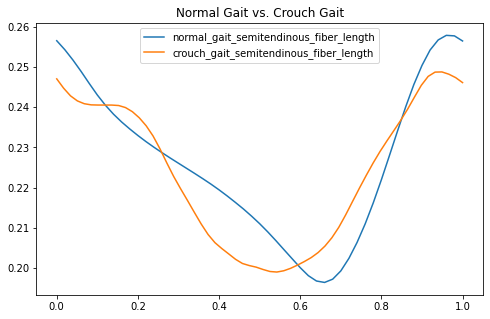

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 1, figsize=(8, 5))

sns.lineplot(x=time_normal_gait, y=fiber_length_semitendinous_normal_gait.to_numpy(), ax=axes, label='normal_gait_semitendinous_fiber_length')
sns.lineplot(x=time_crouch_gait, y=fiber_length_semitendinous_crouch_gait.to_numpy(), ax=axes, label='crouch_gait_semitendinous_fiber_length').set(title='Normal Gait vs. Crouch Gait')

**Questions: Hamstrings Length**

**1.** Study the curves. Based on the plot, how do the peak hamstring lengths in normal and crouch gait compare? For this patient, would you recommend a hamstrings lengthening surgery? 

**2.** What are some limitations of your analysis?

## 4.6. Conclussion

In this tutorial you have downloaded and explored a model of the lower extremity. The, you have used this model to study the angle of the knees using two different motion files captured from two real persons. Finally, you have performed a Muscle Analysis to determine the fiber length of the semitendinous muscle between the two persons.

## 4.7. Useful Links





> **OpenSim Website:** https://opensim.stanford.edu/
>
> **OpenSim API Documentation:** https://simtk.org/api_docs/opensim/api_docs/
> 
> **OpenSim Creator Website:** https://opensimcreator.com/
> 
> **SimTK Website:** https://simtk.org/projects/opensim
> 
> **Biomecanics of Movement's Course:** https://www.youtube.com/channel/UCDNGy0KKNLQ-ztcL5h2Z6zA

## 4.8. References

> [1].   Uchida, T. K., Delp, S. L., & Delp, D. (2021). **Biomechanics of movement: The science of sports, robotics, and rehabilitation.** *MIT Press*. https://mitpress.mit.edu/9780262044202/biomechanics-of-movement/
>
> [2].   Delp, S. L., Anderson, F. C., Arnold, A. S., Loan, P., Habib, A., John, C. T., Guendelman, E., & Thelen, D. G. (2007). **OpenSim: open-source software to create and analyze dynamic simulations of movement.** *IEEE Transactions on Bio-Medical Engineering*, 54(11), 1940–1950. https://doi.org/10.1109/TBME.2007.901024
>
> [3].   Delp, S. L., Loan, J. P., Hoy, M. G., Zajac, F. E., Topp, E. L., & Rosen, J. M. (1990). **An interactive graphics-based model of the lower extremity to study orthopaedic surgical procedures.** *IEEE Transactions on Bio-Medical Engineering*, 37(8), 757–767. https://doi.org/10.1109/10.102791
> 
> [4].   Arnold, A. S., Liu, M. Q., Schwartz, M. H., Ounpuu, S., & Delp, S. L. (2006). **The role of estimating muscle-tendon lengths and velocities of the hamstrings in the evaluation and treatment of crouch gait.** *Gait & Posture*, 23(3), 273–281. https://doi.org/10.1016/j.gaitpost.2005.03.003
